# TO DO 1: EDA

In [43]:
import pandas as pd 
import seaborn as sns
import numpy as np 

e_customer = pd.read_csv('Ecommerce Customers.csv')
e_customer.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [44]:
e_customer.shape

(500, 8)

- Bộ dữ liệu có 500 hàng và 8 cột, tương ứng với 500 quan sát và 8 trường dữ liệu

In [45]:
e_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


- Tất cả các trường của mỗi quan sát đều được điền đầy đủ, do đó không có quan sát nào chứa giá trị trống
- 3 trường đầu tiên bao gồm Email, Address, Avatar là các trường định tính chứa các thông tin về email, địa chỉ và avatar của khách hàng
- 5 trường tiếp theo chứa các thông tin định lượng bao gồm thời gian trung bình mỗi session, thời gian sử dụng trên App, thời gian sử dụng trên website, thời gian đăng kí thành viên, và lượng tiền bỏ ra hàng năm của khách hàng.

In [46]:
e_customer.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


**Nhìn vào bản tóm tắt data, ta có thể nhận ra một số điểm sau:**
- Thời gian trung bình trên website nhiều hơn trên App cho thấy người dùng của sàn thương mại điện tử này có xu hướng thích truy cập vào website của sàn hơn là sử dụng điện thoại để truy cập App
- Giá trị mean của các trường xấp xỉ median cho thấy phân phối của các trường này khá đều, cũng như ít có các outlier


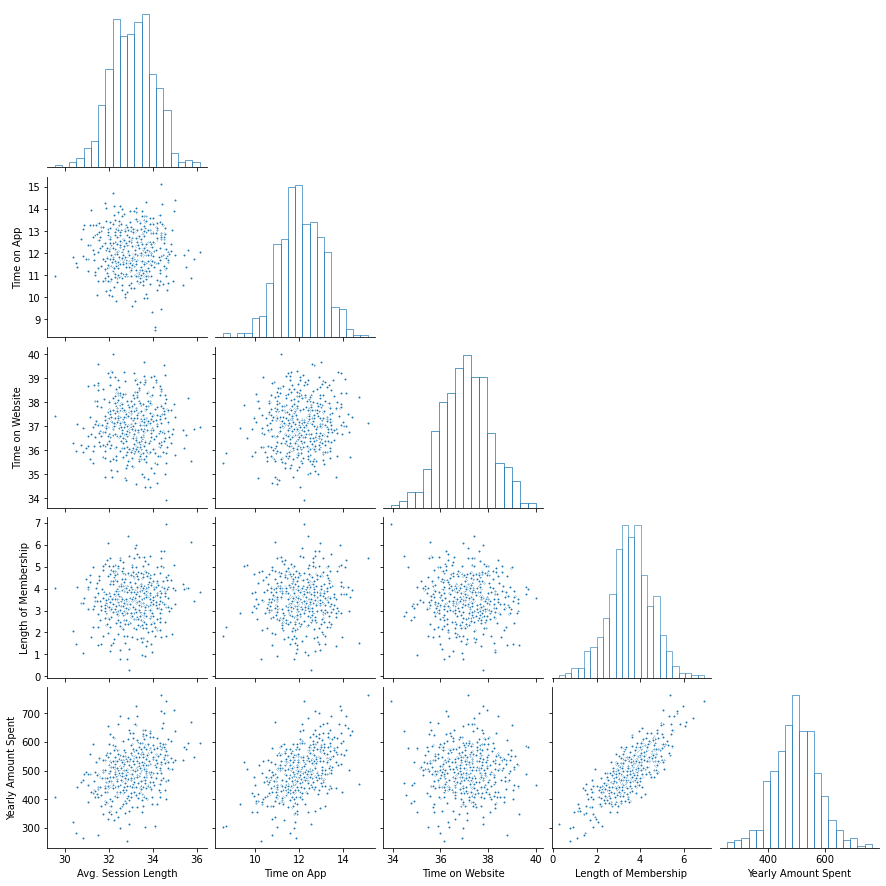

In [47]:
sns.pairplot(e_customer, corner=True, diag_kws=dict(fill=False), plot_kws=dict(marker=".", linewidth=1))

- Dựa vào các biểu đồ histogram, ta có thể thấy các trường quan sát không có các giá trị outlier nào đáng kể, cũng như đa phần giá trị các trường tuân theo phân phối chuẩn

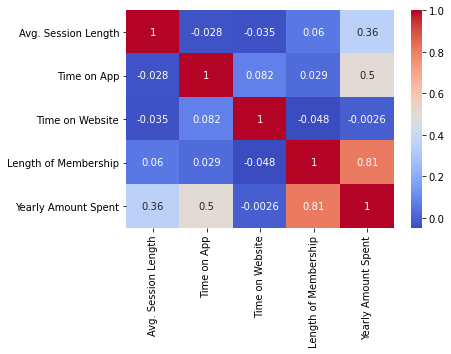

In [48]:
sns.heatmap(e_customer.corr(), annot= True, cmap='coolwarm')

** Từ biểu đồ scatter plot và heatmap của các trường như trên, ta có thể đưa ra một số nhận xét như sau: **
- Thời gian đăng ký khách hàng và lượng tiền khách hàng có tương quan dương khá cao với nhau, tức là khách hàng càng lâu năm thì càng chi nhiều tiền cho sàn thương mại điện tử này. Điều này cho thấy khả năng giữ chân và chất lượng của sàn thương mại điện tử này rất tốt. Không giống như các sàn thương mại điện tử thường tung ra các chương trình ưu đãi, khuyến mại để thu hút các khách hàng mới mà không chú trọng vào việc nâng cao trải nghiệm người dùng. Các sàn thương mại điển tử kiểu này thường chỉ thu hút được lượng khách hàng mới chi nhiều tiền vào ban đầu, sau đó chất lượng dịch vụ không tốt thì dẫn đến việc các khách hàng lâu năm sẽ không còn chi tiền nhiều như ban đầu nữa.

- Thời gian sử dụng trên App cũng có tương quan dương khá cao với lượng tiền bỏ ra hàng năm, còn thời gian sử dụng trên website thì lại không có tương quan với lượng tiền bỏ ra hàng năm. Trong khi đó lượng thời gian trung bình bỏ ra trên App lại thấp hơn trên website, do đó khả năng cao các khách hàng thường chỉ tham khảo các thông tin về các sản phẩm trên website, sau đó họ sẽ cân nhắc lựa chọn và khi đưa ra quyết định mua hàng, họ sẽ dùng điện thoại để đặt đơn. Điều này cũng dễ hiểu vì khi mua hàng trên các trang thương mại điện tử, truy cập vào website và mở nhiều tab với nhiều sản phẩm, người dùng sẽ dễ so sánh các sản phẩm với nhau hơn trên điện thoại. Và khách hàng sau khi so sánh các sản phẩm với nhau sẽ suy nghĩ thêm một thời gian nữa liệu có nên mua sản phầm đó hay không, khi họ đã đưa ra được quyết định, việc vào App để đặt sẽ tiện hơn việc truy cập website để đặt sản phẩm
- Các yếu tố còn lại có tương quan không quá cao với lượng tiền bỏ ra hàng năm và cũng không có tương quan đáng kể với nhau

- Ban đầu, em nghĩ thời gian trung bình của mỗi session sẽ có tương quan dương cao với thời gian bỏ ra trên App hoặc website. Hoặc là thời gian sử dụng trên website sẽ có tương quan âm cao với thời gian sử dụng trên App. Tuy nhiên dữ liệu lại không thể hiện điều đó, có nghĩa là, xu hướng sử dụng sàn thương mại điện tử này của mọi người rất đa dạng. Cùng một lượng thời gian bỏ ra truy cập App hoặc website, có người sẽ tùy hứng truy cập nhiều lần với thời gian ngắn mỗi lần truy cập, cũng có người lại chọn truy cập ít lần nhưng mỗi lần truy cập sẽ bỏ ra nhiều thời gian hơn để có thể lựa chọn kỹ càng. Điều này cũng có thể hiểu được khi xu hướng sử dụng của mỗi người là khác nhau.

# TODO 2: LINEAR REGRESSIONS

In [49]:
# Processing Data
x = e_customer[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = e_customer['Yearly Amount Spent']
				

In [50]:
# Split Data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [51]:
# Modeling
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

In [52]:
predict = model.predict(X_test)

Text(0, 0.5, 'predicted values')

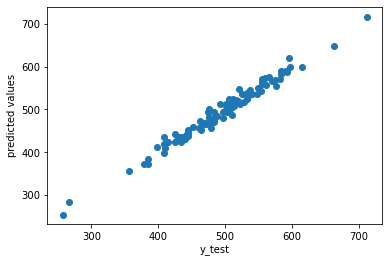

In [53]:
plt.scatter(Y_test,predict)
plt.xlabel('y_test')
plt.ylabel('predicted values')

In [65]:
# Evaluation
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, predict))
print('MSE:', metrics.mean_squared_error(Y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predict)))

MAE: 8.215734139721656
MSE: 111.2028998157429
RMSE: 10.545278555625872


# TODO 3: CUSTOMER CLUSTERING

In [55]:
from sklearn.cluster import KMeans
data = e_customer.loc[:,['Yearly Amount Spent','Avg. Session Length','Time on App','Time on Website','Length of Membership']]
data.head()

,Yearly Amount Spent,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,587.951054,34.497268,12.655651,39.577668,4.082621
1,392.204933,31.926272,11.109461,37.268959,2.664034
2,487.547505,33.000915,11.330278,37.110597,4.104543
3,581.852344,34.305557,13.717514,36.721283,3.120179
4,599.406092,33.330673,12.795189,37.536653,4.446308


In [56]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(data)
    kmeanModel.fit(data)
 
    distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / data.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(data, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / data.shape[0]
    mapping2[k] = kmeanModel.inertia_

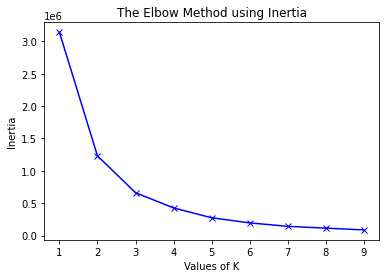

In [57]:
import matplotlib.pyplot as plt
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [58]:
kmeans = KMeans(n_clusters=3)
data['Cluster'] = kmeans.fit_predict(data)
data['Cluster'] = data['Cluster'].astype('category')
data.head()


,Yearly Amount Spent,Avg. Session Length,Time on App,Time on Website,Length of Membership,Cluster
0,587.951054,34.497268,12.655651,39.577668,4.082621,1
1,392.204933,31.926272,11.109461,37.268959,2.664034,0
2,487.547505,33.000915,11.330278,37.110597,4.104543,2
3,581.852344,34.305557,13.717514,36.721283,3.120179,1
4,599.406092,33.330673,12.795189,37.536653,4.446308,1


In [59]:
data.groupby('Cluster').describe()

Yearly Amount Spent                                                 \
                      count        mean        std         min         25%   
Cluster                                                                      
0                     143.0  405.991803  42.722297  256.670582  388.237633   
1                     119.0  600.861572  44.366361  552.940345  570.540912   
2                     238.0  504.612034  26.663346  456.469510  482.659597   

                                            Avg. Session Length             \
                50%         75%         max               count       mean   
Cluster                                                                      
0        418.150081  438.746254  453.169502               143.0  32.672806   
1        587.951054  617.848747  765.518462               119.0  33.580691   
2        503.196239  529.020158  551.620145               238.0  33.017997   

         ... Time on Website            Length of Membership            \
         ...             75%        max                count      mean   
Cluster  ...                                                             
0        ...       37.731456  40.005182                143.0  2.567689   
1        ...       37.674116  39.672591                119.0  4.523769   
2        ...       37.708356  39.600376                238.0  3.618583   

                                                                     
              std       min       25%       50%       75%       max  
Cluster                                                              
0        0.785293  0.269901  2.090555  2.627625  3.153796  4.238296  
1        0.734715  2.909008  4.005839  4.541695  5.002532  6.922689  
2        0.633807  1.810080  3.187370  3.580843  4.021445  5.113319  

[3 rows x 40 columns]

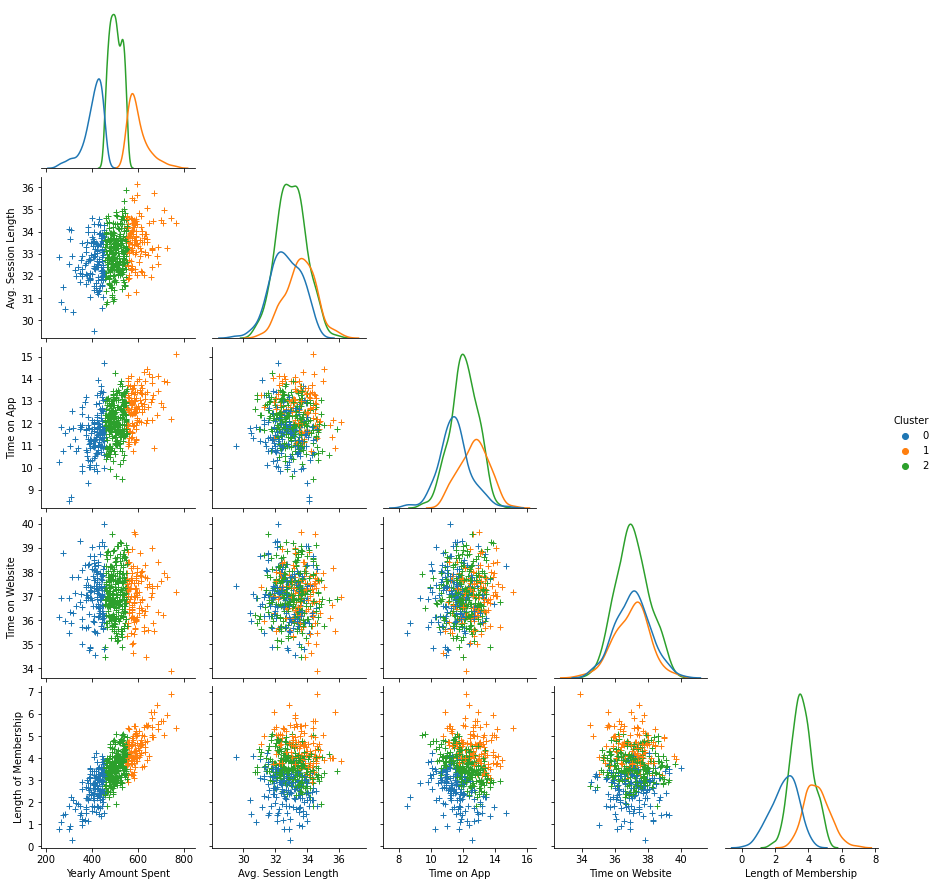

In [60]:
sns.pairplot(data, corner=True, hue= 'Cluster', diag_kws=dict(fill=False), plot_kws=dict(marker="+", linewidth=1))

- Có thể thấy nhóm khách hàng chi nhiều tiền nhất nằm ở nhóm 1 có xu hướng thời gian sử dụng trên App cao hơn nhóm khách hàng có thu nhập thấp số 0, do đó công ty nên tập trung hơn vào mảng App, tăng trải nghiệm người dùng để giữ chân nhóm khách hàng này tốt hơn. 
- Ngoài ra thời gian trung bình mỗi session của nhóm 1 cũng cao hơn nhóm 0, do nhóm khách hàng quan tâm thường bỏ nhiều thời gian ra để tìm hiểu món đồ mình định mua hơn những nhóm khách hàng không có ý định mua. Công ty có thể thêm một số chương trình kiểu như khách hàng truy cập trên 30 phút thì hiện pop up giảm giá sản phẩm nào đó để thu hút người dùng hơn
- Và như đã đề cập ở trên, thời gian đăng kí thành viên có tương quan rất cao với lượng tiền chi ra của khách hàng, do đó công ty nên có những ưu đãi cho khách hàng lâu năm. (maybe cái này em bị dính [thiên lệch kẻ sống sót](https://spiderum.com/bai-dang/HIEU-UNG-THIEN-LECH-KE-SONG-SOT-GIOI-VA-XUAT-CHUNG-5gj) )

# TODO 4: Decision Tree

In [61]:
#Process data
high = e_customer['Yearly Amount Spent'] > e_customer['Yearly Amount Spent'].quantile(0.8)
e_customer['HighVal_cust'] = 0
e_customer.loc[high,'HighVal_cust'] = 1

In [62]:
# Split Data
feature_cols =['Avg. Session Length','Time on App','Time on Website','Length of Membership']
X = e_customer[feature_cols]
y = e_customer['HighVal_cust']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1 )
X_train.shape, X_test.shape

((400, 4), (100, 4))

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
high_cust = DecisionTreeClassifier(max_depth=5)
high_cust.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

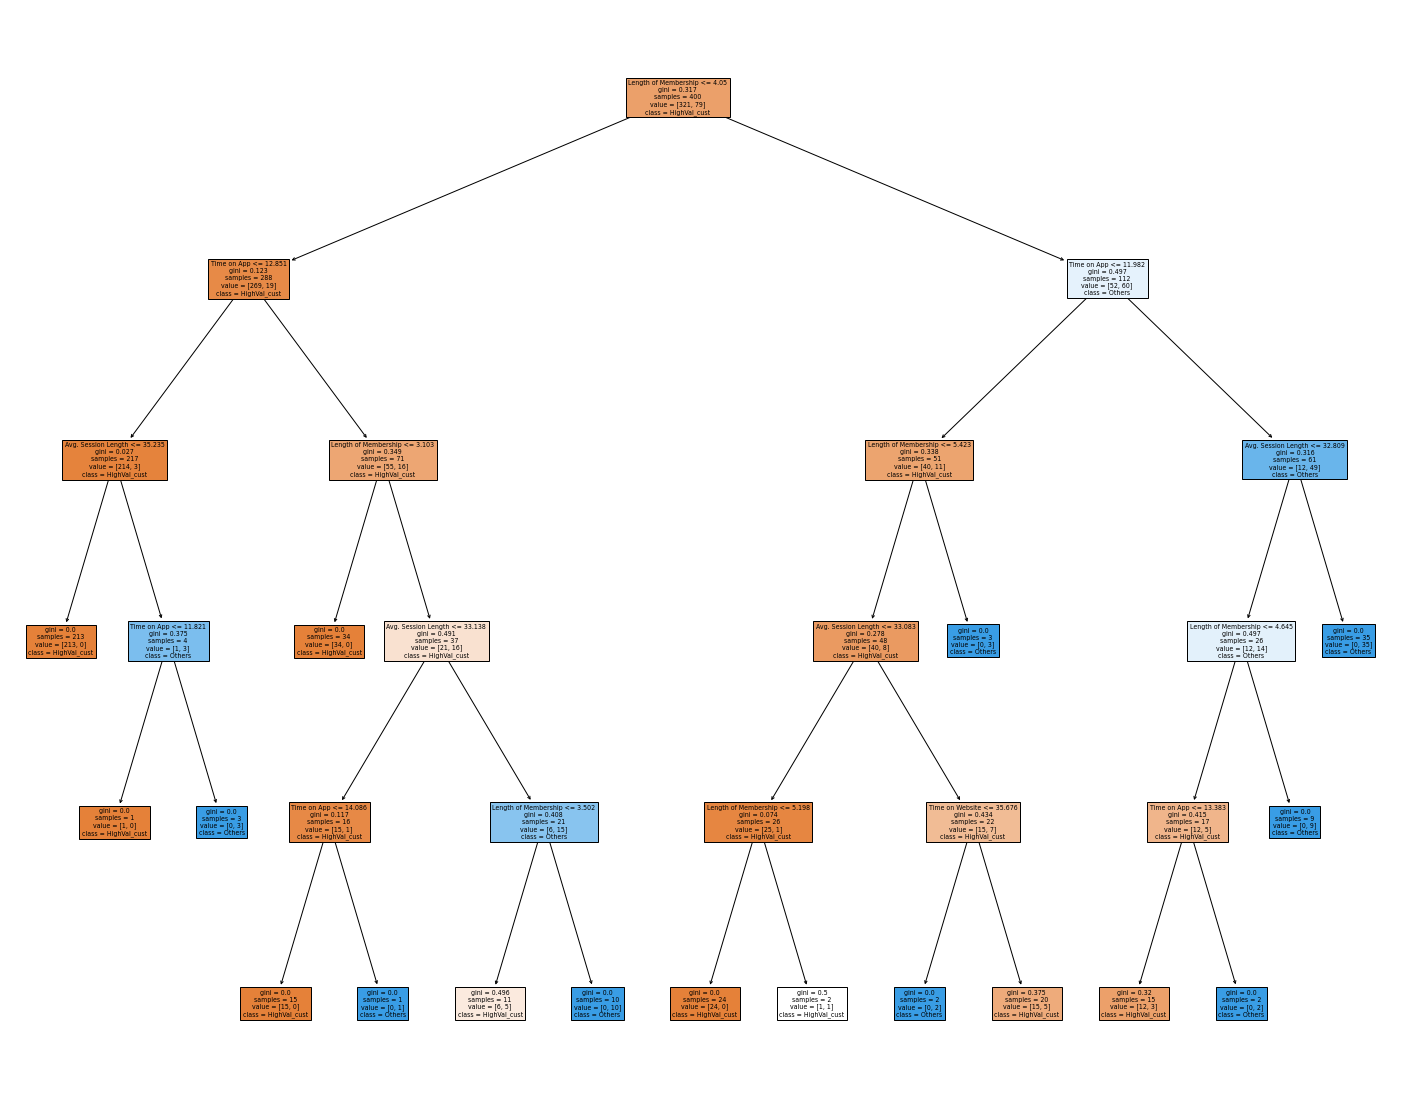

In [66]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(high_cust, 
                   feature_names=X_train.columns,  
                   class_names=['HighVal_cust','Others'],
                   filled=True)